In [0]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [0]:
map_df = gpd.read_file('geo_export_34b7280a-bac8-4bce-afcd-3357738356c2.shp')

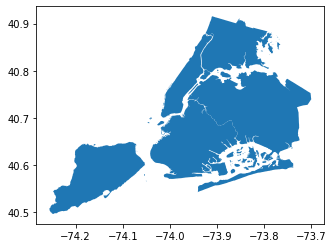

In [0]:
map_df.plot()

In [0]:
df_all = pd.read_excel('final_dataset.xlsx')

In [0]:
df_air = df_all[['borough','Overall AQI Value']]
p = []
for i in range(5):
  k = 0
  for j in range(len(df_air)):
    if df_air['borough'][j] == i:
      k = k + df_air['Overall AQI Value'][j]
  p.append(k/12)

  k = pd.DataFrame(p)
  k = k.rename(columns={0:'AQI values'})
  map_df_1 = pd.concat([map_df, k], axis = 1)

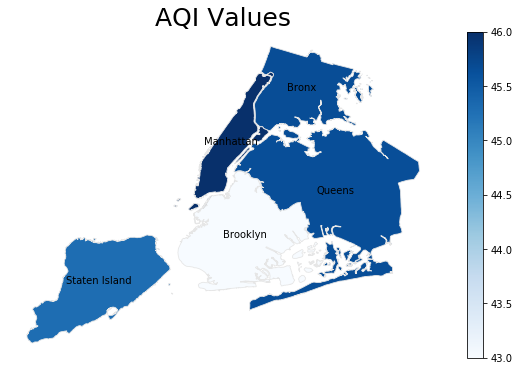

In [0]:
variable = 'AQI values'
vmin, vmax = 43, 46
fig, ax = plt.subplots(1, figsize=(10, 6))
map_df_1.plot(column=variable, cmap= 'Blues', linewidth=0.8, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('AQI Values', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)#saving our map as .png file.
#ax.annotate('Source: NYC Data',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
map_df_1.apply(lambda x: ax.annotate(s=x.boro_name, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
fig.savefig('AQiValues.png', dpi=300)

In [0]:
df_crime = df_all[['borough','BURGLARY', 'DANGEROUS DRUGS', 'SEX CRIMES']]

bur1 = []
drugs1 = []
se_crimes1 = []
for i in range(5):
  bur = 0
  drugs = 0
  se_crimes = 0
  for j in range(len(df_crime)):
    if df_crime['borough'][j] == i:
      bur = bur + df_crime['BURGLARY'][j]
      drugs = drugs + df_crime['DANGEROUS DRUGS'][j]
      se_crimes = se_crimes + df_crime['SEX CRIMES'][j]
  bur1.append(bur/12)
  drugs1.append(drugs/12)
  se_crimes1.append(se_crimes/12)

  k = pd.DataFrame(bur1)
k = k.rename(columns={0:'Burglary'})
l = pd.DataFrame(drugs1)
l = l.rename(columns={0:'Drugs'})
n = pd.DataFrame(se_crimes1)
n = n.rename(columns={0:'Sex Crimes'})

In [0]:
borough = ['Brooklyn', 'Staten Island', 'Manhattan', 'Bronx', 'Queens']
bo = pd.DataFrame(borough)
bo = bo.rename(columns={0:'boro_name'})

In [0]:
crime_avg = pd.concat([bo, k, l, n], axis = 1 )

In [0]:
crime_avg

,boro_name,Burglary,Drugs,Sex Crimes
0,Brooklyn,341.333333,480.833333,143.166667
1,Staten Island,40.666667,61.416667,15.750000
2,Manhattan,197.833333,536.416667,148.000000
3,Bronx,209.166667,629.500000,92.833333
4,Queens,263.500000,131.500000,87.166667


In [0]:
merge1 = pd.merge(map_df_1, crime_avg, on = 'boro_name')

In [0]:
merge1

,boro_code,boro_name,shape_area,shape_leng,geometry,AQI values,Burglary,Drugs,Sex Crimes
0,2.0,Bronx,1.186612e+09,462958.188213,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",43.968613,209.166667,629.500000,92.833333
1,5.0,Staten Island,1.623756e+09,325960.634597,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",42.000000,40.666667,61.416667,15.750000
2,3.0,Brooklyn,1.937593e+09,738745.835869,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...",30.053983,341.333333,480.833333,143.166667
3,4.0,Queens,3.045885e+09,904390.137335,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...",43.900000,263.500000,131.500000,87.166667
4,1.0,Manhattan,6.366027e+08,361212.479734,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",45.700000,197.833333,536.416667,148.000000


0            Annotation(-73.8665, 40.8526, 'Bronx')
1    Annotation(-74.1534, 40.5808, 'Staten Island')
2         Annotation(-73.9477, 40.6447, 'Brooklyn')
3           Annotation(-73.8185, 40.7076, 'Queens')
4        Annotation(-73.9672, 40.7773, 'Manhattan')
dtype: object

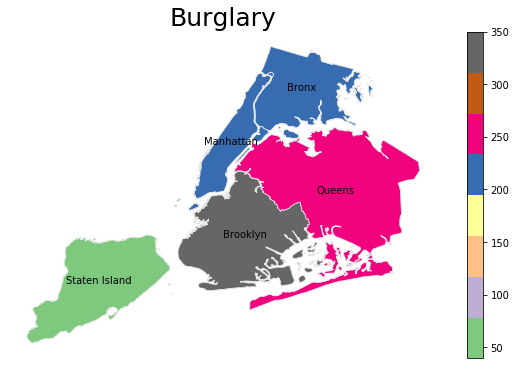

In [0]:
variable = 'Burglary'
vmin, vmax = 40, 350 
fig, ax = plt.subplots(1, figsize=(10, 6))
merge1.plot(column=variable, cmap= 'Accent', linewidth=0.8, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('Burglary', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Accent', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)#saving our map as .png file.
#ax.annotate('Source: NYC Data',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#ax = df.plot()
merge1.apply(lambda x: ax.annotate(s=x.boro_name, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

0            Annotation(-73.8665, 40.8526, 'Bronx')
1    Annotation(-74.1534, 40.5808, 'Staten Island')
2         Annotation(-73.9477, 40.6447, 'Brooklyn')
3           Annotation(-73.8185, 40.7076, 'Queens')
4        Annotation(-73.9672, 40.7773, 'Manhattan')
dtype: object

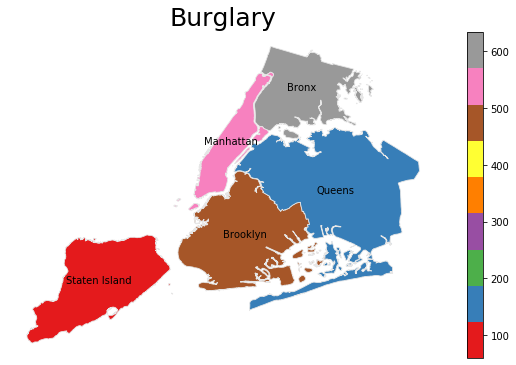

In [0]:
variable = 'Drugs'
vmin, vmax = 60, 635
fig, ax = plt.subplots(1, figsize=(10, 6))
merge1.plot(column=variable, cmap= 'Set1', linewidth=0.8, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('Burglary', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Set1', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)#saving our map as .png file.
#ax.annotate('Source: NYC Data',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#ax = df.plot()
merge1.apply(lambda x: ax.annotate(s=x.boro_name, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

0            Annotation(-73.8665, 40.8526, 'Bronx')
1    Annotation(-74.1534, 40.5808, 'Staten Island')
2         Annotation(-73.9477, 40.6447, 'Brooklyn')
3           Annotation(-73.8185, 40.7076, 'Queens')
4        Annotation(-73.9672, 40.7773, 'Manhattan')
dtype: object

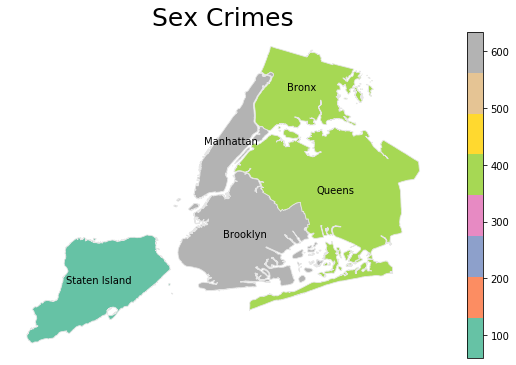

In [0]:
variable = 'Sex Crimes'
vmin, vmax = 60, 635
fig, ax = plt.subplots(1, figsize=(10, 6))
merge1.plot(column=variable, cmap= 'Set2', linewidth=0.8, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('Sex Crimes', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Set2', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)#saving our map as .png file.
#ax.annotate('Source: NYC Data',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#ax = df.plot()
merge1.apply(lambda x: ax.annotate(s=x.boro_name, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [0]:
df_street = df_all[['borough', 'Acceptable Streets %', 'Acceptable Sidewalks %']]
df_street = df_street.fillna(0)

stre1 = []
walk1 = []
for i in range(5):
  stre = 0
  walk = 0
  for j in range(len(df_street)):
    if df_street['borough'][j] == i:
      stre = stre + df_street['Acceptable Streets %'][j]
      walk = walk + df_street['Acceptable Sidewalks %'][j]
  stre1.append(stre/12)
  walk1.append(walk/12)

  s = pd.DataFrame(stre1)
s = s.rename(columns={0:'Streets'})
w = pd.DataFrame(walk1)
w = w.rename(columns={0:'walk'})
street_avg = pd.concat([bo, s, w], axis = 1 )

merge2 = pd.merge(merge1, street_avg, on = 'boro_name')

0            Annotation(-73.8665, 40.8526, 'Bronx')
1    Annotation(-74.1534, 40.5808, 'Staten Island')
2         Annotation(-73.9477, 40.6447, 'Brooklyn')
3           Annotation(-73.8185, 40.7076, 'Queens')
4        Annotation(-73.9672, 40.7773, 'Manhattan')
dtype: object

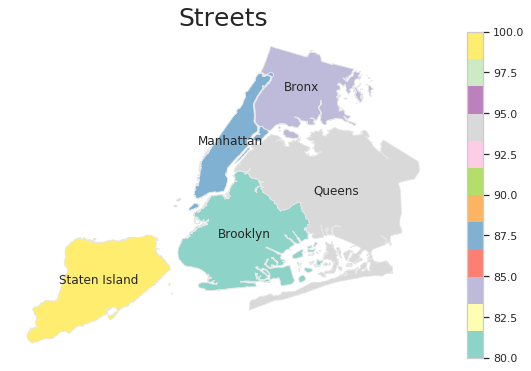

In [0]:
variable = 'Streets'
vmin, vmax = 80, 100 
fig, ax = plt.subplots(1, figsize=(10, 6))
merge2.plot(column=variable, cmap= 'Set3', linewidth=0.8, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('Streets', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Set3', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)#saving our map as .png file.
#ax.annotate('Source: NYC Data',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#ax = df.plot()
merge2.apply(lambda x: ax.annotate(s=x.boro_name, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

0            Annotation(-73.8665, 40.8526, 'Bronx')
1    Annotation(-74.1534, 40.5808, 'Staten Island')
2         Annotation(-73.9477, 40.6447, 'Brooklyn')
3           Annotation(-73.8185, 40.7076, 'Queens')
4        Annotation(-73.9672, 40.7773, 'Manhattan')
dtype: object

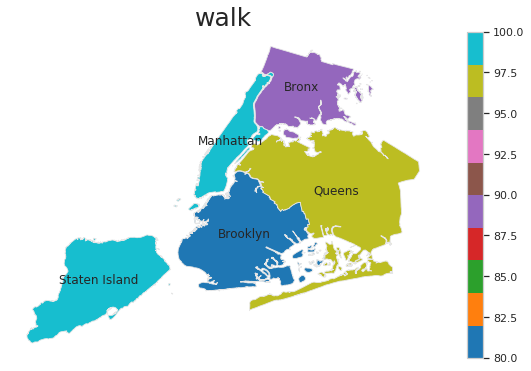

In [0]:
variable = 'walk'
vmin, vmax = 80, 100 
fig, ax = plt.subplots(1, figsize=(10, 6))
merge2.plot(column=variable, cmap= 'tab10', linewidth=0.8, ax=ax, edgecolor='0.9')
ax.axis('off')
ax.set_title('walk', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='tab10', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)#saving our map as .png file.
#ax.annotate('Source: NYC Data',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
#ax = df.plot()
merge2.apply(lambda x: ax.annotate(s=x.boro_name, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)